In [1]:
library(dplyr)
library(lubridate)
library(ggplot2)
library(maps)
library(ggrepel)
library(dendextend)

library(ggplot2)
library(maps)
library(FNN)
library(sp)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



---------------------
Welcome to dendextend version 1.19.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:


In [ ]:
# observations <- read.csv("../observations.csv")
head(observations)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,20.2,NA,NA,NA,NA,15.8,48.581000,5.959833,336,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,24.1,NA,NA,NA,NA,25.0,4.822333,-52.365333,4,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,4.4,NA,NA,NA,NA,-2.8,43.005333,1.106833,414,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,25.0,NA,23.8,NA,29.2,NA,17.901500,-62.852167,44,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,8.9,NA,NA,NA,NA,NA,49.725167,-1.939833,6,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,7.6,NA,NA,NA,NA,2.7,47.267833,5.088333,219,12


In [3]:
colnames(observations)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.4"                                      
[45] "Nébulosité.couche.nuageuse.1"                             
[46] "Type.nuage.1"                                             
[47] "Hauteur.de.base.1"                                        
[48] "Nébulosité.couche.nuageuse.2"                             
[49] "Type.nuage.2"                                             
[50] "Hauteur.de.base.2"                                        
[51] "Nébulosité.couche.nuageuse.3"                             
[52] "Type.nuage.3"                                             
[53] "Hauteur.de.base.3"                                        
[54] "Nébulosité.couche.nuageuse.4"                             
[55] "Type.nuage.4"                                             
[56] "Hauteur.de.base.4"                                        
[57] "Température...C."                                         
[58] "Température.minimale.sur.12.heures...C."                  
[59] "Température.minimale.sur.24.heures...C."                  
[60] "Température.maximale.sur.12.heures...C."                  
[61] "Température.maximale.sur.24.heures...C."                  
[62] "Température.minimale.du.sol.su

In [5]:
stations = read.csv("../stations.csv")
head(stations)

,ID.OMM.station,Latitude,Longitude,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,7005,50.13600,1.834000,69,Abbeville,80001,CA de la Baie de Somme,200070993,Somme,80,Hauts-de-France,32
2,7015,50.57000,3.097500,47,Fretin,59256,Métropole Européenne de Lille,245900410,Nord,59,Hauts-de-France,32
3,7020,49.72517,-1.939833,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28
4,7027,49.18000,-0.456167,67,Carpiquet,14137,CU Caen la Mer,200065597,Calvados,14,Normandie,28
5,7037,49.38300,1.181667,151,Boos,76116,Métropole Rouen Normandie,200023414,Seine-Maritime,76,Normandie,28
6,7072,49.20967,4.155333,95,Prunay,51449,CU du Grand Reims,200067213,Marne,51,Grand Est,44


In [6]:
# stations_climat <- observations %>%
#   group_by(ID.OMM.station, Latitude, Longitude, Altitude) %>%
#   summarise(temp_moy = mean(Température, na.rm=TRUE),
#             temp_sd = sd(Température, na.rm=TRUE),
#             hum_moy = mean(Humidité, na.rm=TRUE),
#             # hum_sd = sd(Humidité, na.rm=TRUE),
#             vent_moy = mean(Vitesse.du.vent.moyen.10.mn, na.rm=TRUE),
#             # vent_sd = sd(Vitesse.du.vent.moyen.10.mn, na.rm=TRUE),
#             precip_moy = mean(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
#             # precip_sd = sd(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
#             # nebul_moy = mean(Nebulosité.totale, na.rm=TRUE),
#             .groups = "drop")
# stations_climat <- observations %>%
#   group_by(ID.OMM.station, Latitude, Longitude, Altitude) %>%
#   summarise(
#     temp_moy = mean(Température, na.rm=TRUE),
#     temp_amp = max(Température, na.rm=TRUE) - min(Température, na.rm=TRUE),
#     hum_moy = mean(Humidité, na.rm=TRUE),
#     vent_moy = mean(Vitesse.du.vent.moyen.10.mn, na.rm=TRUE),
#     precip_ann = mean(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
#     precip_amp = max(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE) - 
#                  min(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
#     .groups = "drop"
#   )
stations_climat <- observations %>%
  group_by(ID.OMM.station, Latitude, Longitude, Altitude) %>%
  summarise(temp_moy = mean(Température, na.rm=TRUE),
            temp_sd = sd(Température, na.rm=TRUE),
            temp_ete = mean(Température[month(Date) %in% c(6,7,8)], na.rm=TRUE),
            temp_hiver = mean(Température[month(Date) %in% c(12,1,2)], na.rm=TRUE),
            hum_moy = mean(Humidité, na.rm=TRUE),
            hum_sd = sd(Humidité, na.rm=TRUE),
            vent_moy = mean(Vitesse.du.vent.moyen.10.mn, na.rm=TRUE),
            vent_sd = sd(Vitesse.du.vent.moyen.10.mn, na.rm=TRUE),
            precip_moy = mean(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
            precip_sd = sd(Précipitations.dans.les.24.dernières.heures, na.rm=TRUE),
            nebul_moy = mean(Nebulosité.totale, na.rm=TRUE),
            .groups = "drop")

stations_climat <- stations_climat %>%
  left_join(stations %>% 
              select(ID.OMM.station, communes..name., department..name., region..name.),
            by = "ID.OMM.station")

stations_france <- stations_climat %>%
  filter(Latitude >= 42, Latitude <= 51,
         Longitude >= -5, Longitude <= 10)

head(stations_france)

ID.OMM.station,Latitude,Longitude,Altitude,temp_moy,temp_sd,temp_ete,temp_hiver,hum_moy,hum_sd,vent_moy,vent_sd,precip_moy,precip_sd,nebul_moy,communes..name.,department..name.,region..name.
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
7005,50.13600,1.834000,69,284.7995,6.329857,291.1003,278.8929,80.33446,15.00129,3.600912,2.252659,2.194954,4.575288,72.55759,Abbeville,Somme,Hauts-de-France
7015,50.57000,3.097500,47,285.1373,6.913029,292.2792,278.5218,77.25565,17.06096,4.178517,2.452241,1.924008,4.172185,96.49914,Fretin,Nord,Hauts-de-France
7020,49.72517,-1.939833,6,285.9265,4.035360,289.8773,282.0276,81.67951,10.40275,6.758472,3.573506,2.088533,4.540331,69.14118,La Hague,Manche,Normandie
7027,49.18000,-0.456167,67,285.0625,6.023839,290.9454,279.6901,81.25286,13.97170,4.246815,2.474953,1.898839,4.056612,94.13673,Carpiquet,Calvados,Normandie
7037,49.38300,1.181667,151,284.6429,6.682290,291.3540,278.4196,79.98217,16.44134,4.039976,2.133913,2.130887,4.228155,94.67241,Boos,Seine-Maritime,Normandie
7072,49.20967,4.155333,95,284.8362,7.563019,292.4289,278.0861,78.50429,16.95049,3.138859,2.026884,1.598263,3.893918,97.29704,Prunay,Marne,Grand Est


In [7]:
data_scaled <- scale(stations_france %>% 
                       # select(temp_moy, temp_sd, hum_moy, vent_moy, precip_moy)
                        #  select(temp_ete, temp_hiver, hum_moy, vent_moy, precip_moy)
                         # select(vent_moy)
                         select(temp_moy, temp_sd, temp_ete, temp_hiver, hum_moy, hum_sd, vent_moy, vent_sd, precip_moy, precip_sd)
                         # select(temp_moy, temp_amp, hum_moy, vent_moy, precip_ann, precip_amp)
                    )
rownames(data_scaled) <- stations_france$communes..name.

In [83]:
# set.seed(123)
# km_res <- kmeans(data_scaled, centers = 6)

# stations_france$cluster <- factor(km_res$cluster)

Warning message in plot.window(...):
“"hang" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"hang" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"hang" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"hang" is not a graphical parameter”
Warning message in title(...):
“"hang" is not a graphical parameter”


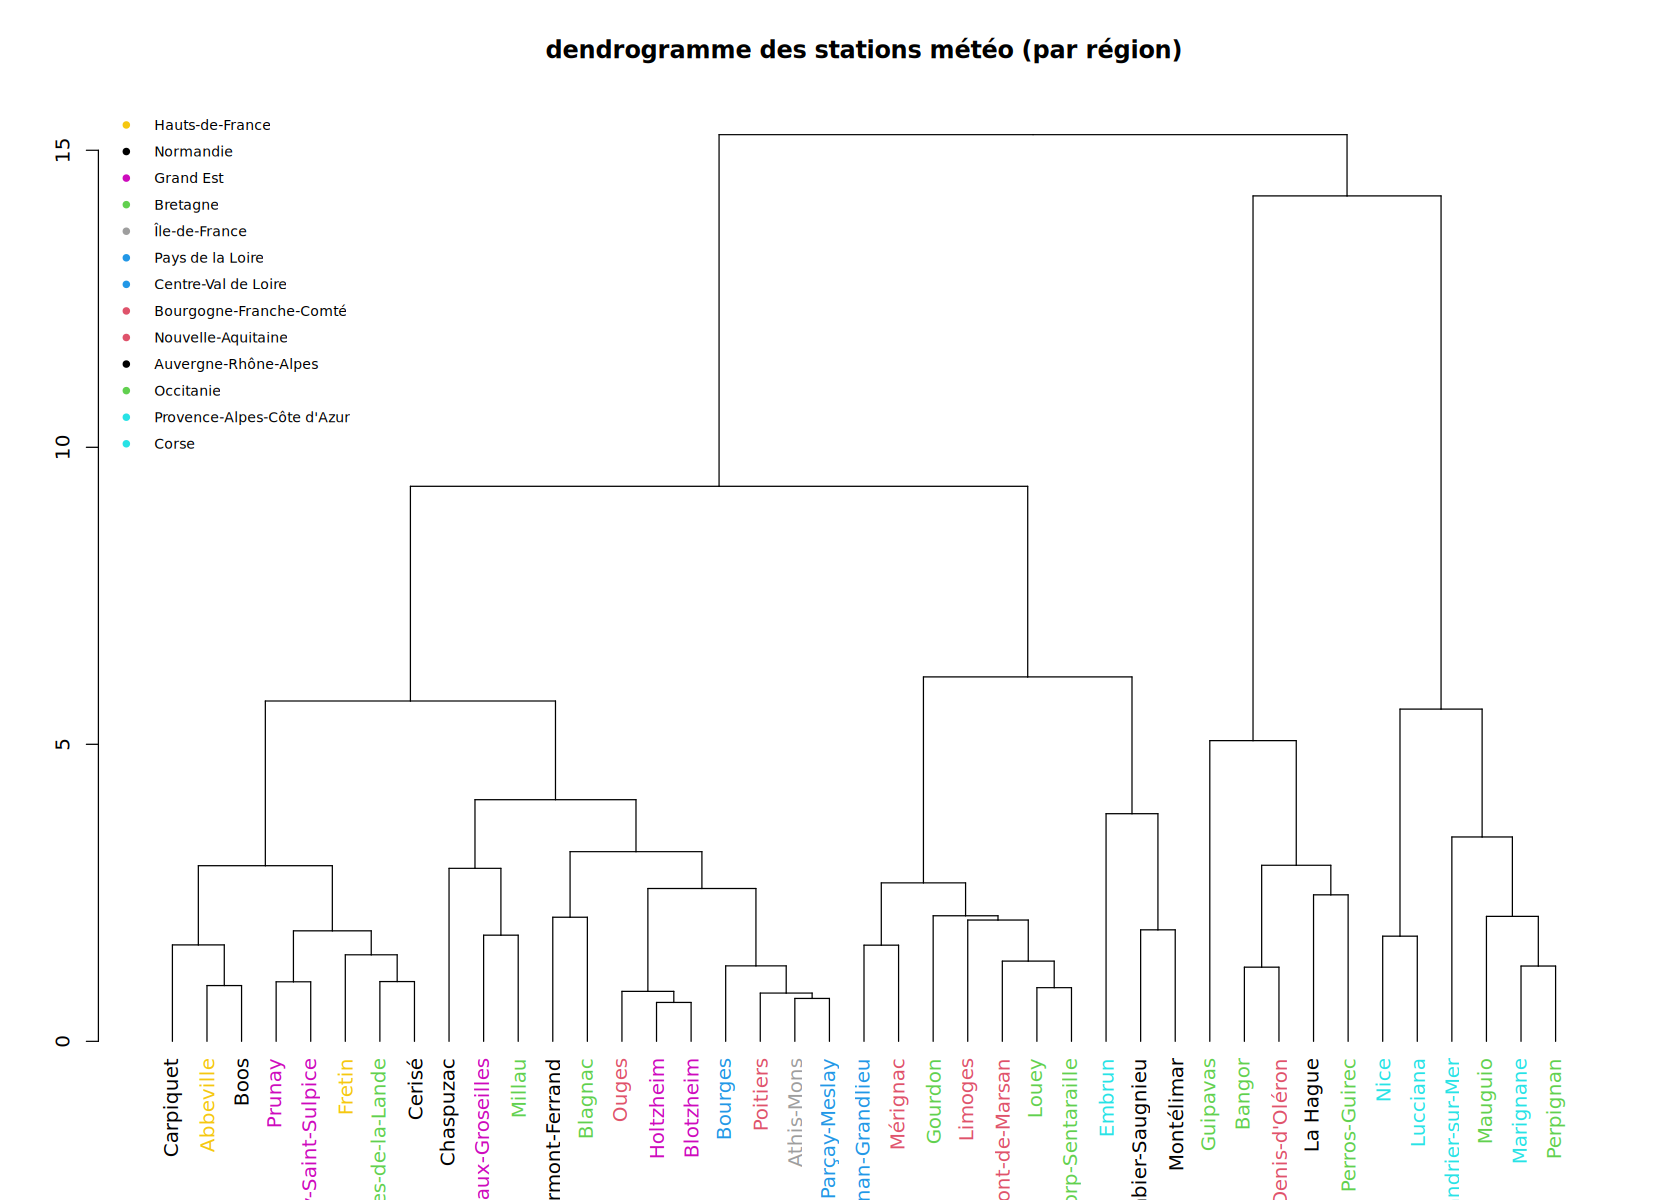

In [8]:
d <- dist(data_scaled, method = "euclidean")
hc_res <- hclust(d, method = "ward.D2")

dend <- as.dendrogram(hc_res)
regions <- stations_france$region..name.
region_colors <- as.numeric(as.factor(regions))  # transforme chaque région en un code couleur
labels_colors(dend) <- region_colors[order.dendrogram(dend)] 

options(repr.plot.width=14, repr.plot.height=10) 
par(bg = 'white')
plot(dend, main = "dendrogramme des stations météo (par région)",
     cex = 0.6, hang = -1)

legend("topleft", legend = unique(regions),
       col = unique(region_colors), pch = 19, cex = 0.7, bty = "n")


In [9]:
clusters_hc <- cutree(hc_res, k = 6)
stations_france$cluster <- factor(clusters_hc)

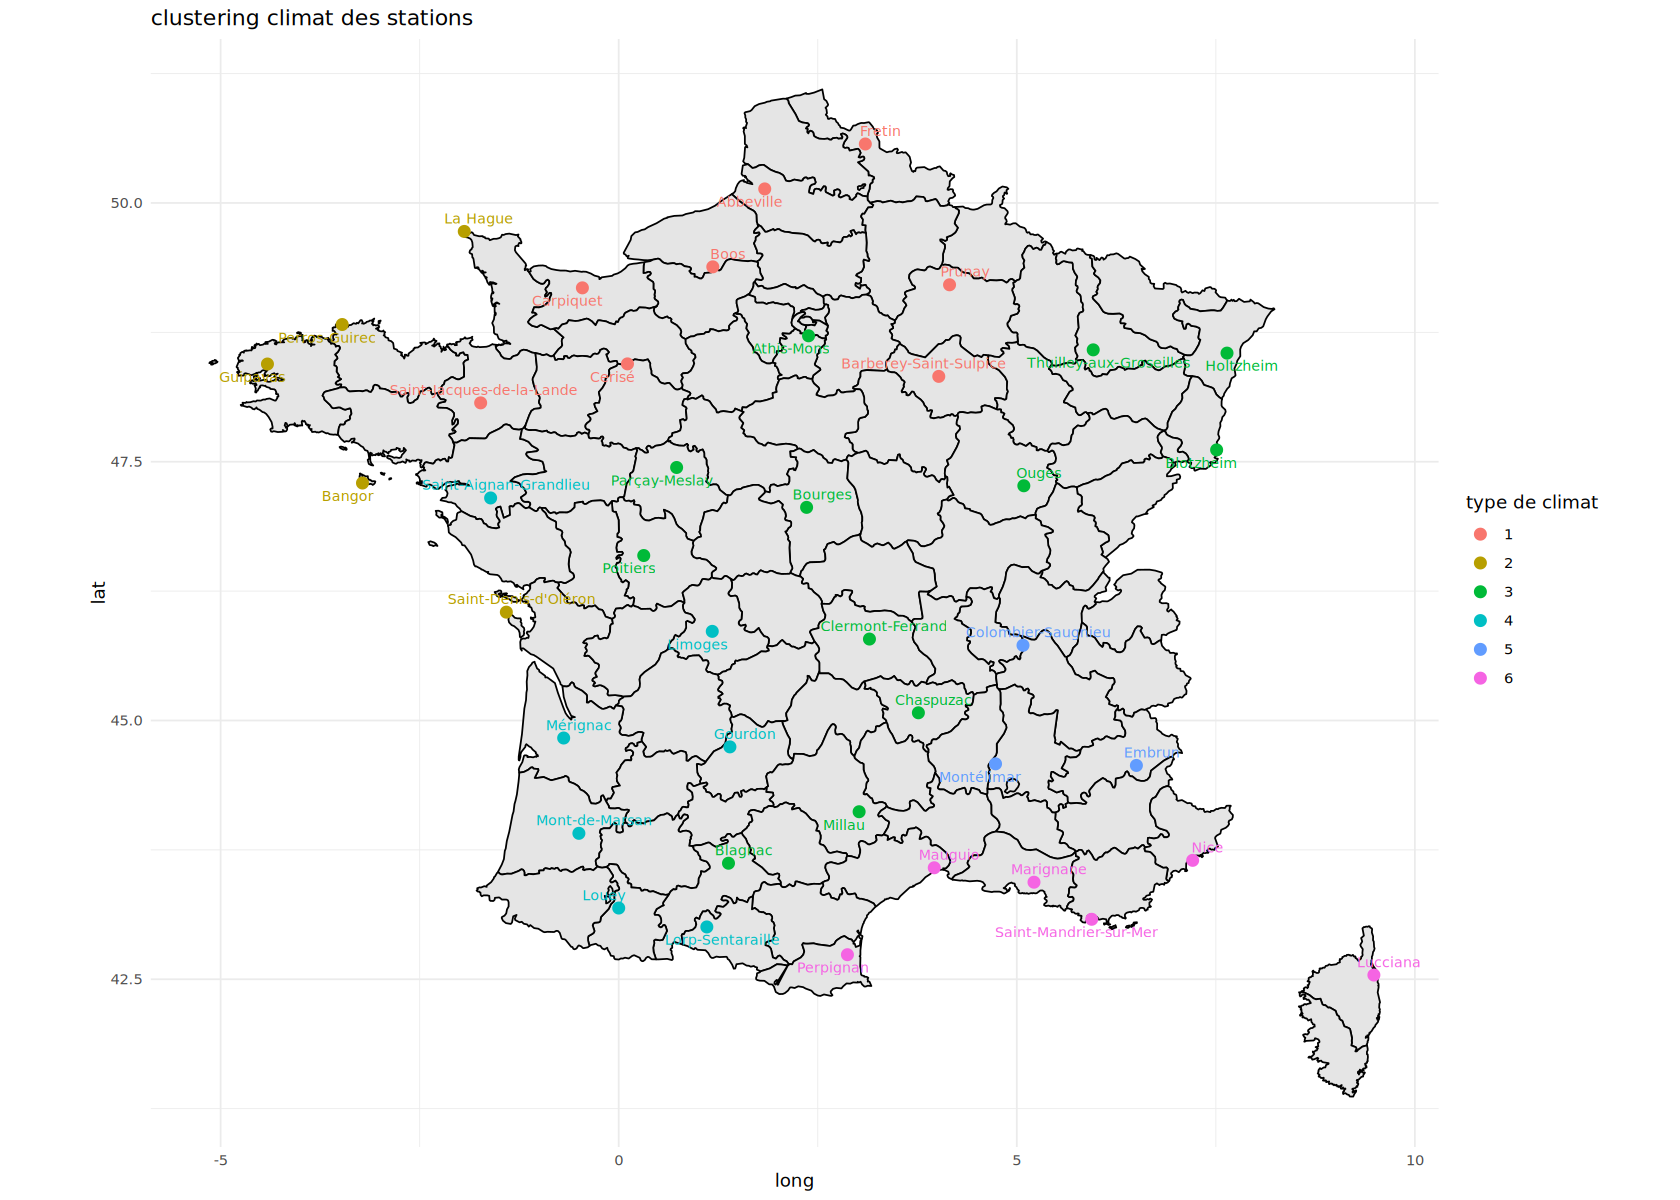

In [10]:
france_map <- map_data("france")

options(repr.plot.width=14, repr.plot.height=10)
ggplot() +
  geom_polygon(data = france_map,
               aes(x = long, y = lat, group = group),
               fill = "grey90", color = "black") +
  geom_point(data = stations_france,
             aes(x = Longitude, y = Latitude, color = cluster),
             size = 3) +
  geom_text_repel(data = stations_france,
                  aes(x = Longitude, y = Latitude, label = communes..name., color = cluster),
                  size = 3, max.overlaps = 20) +
  coord_fixed(1.3) +
  theme_minimal() +
  labs(title = "clustering climat des stations",
       color = "type de climat")


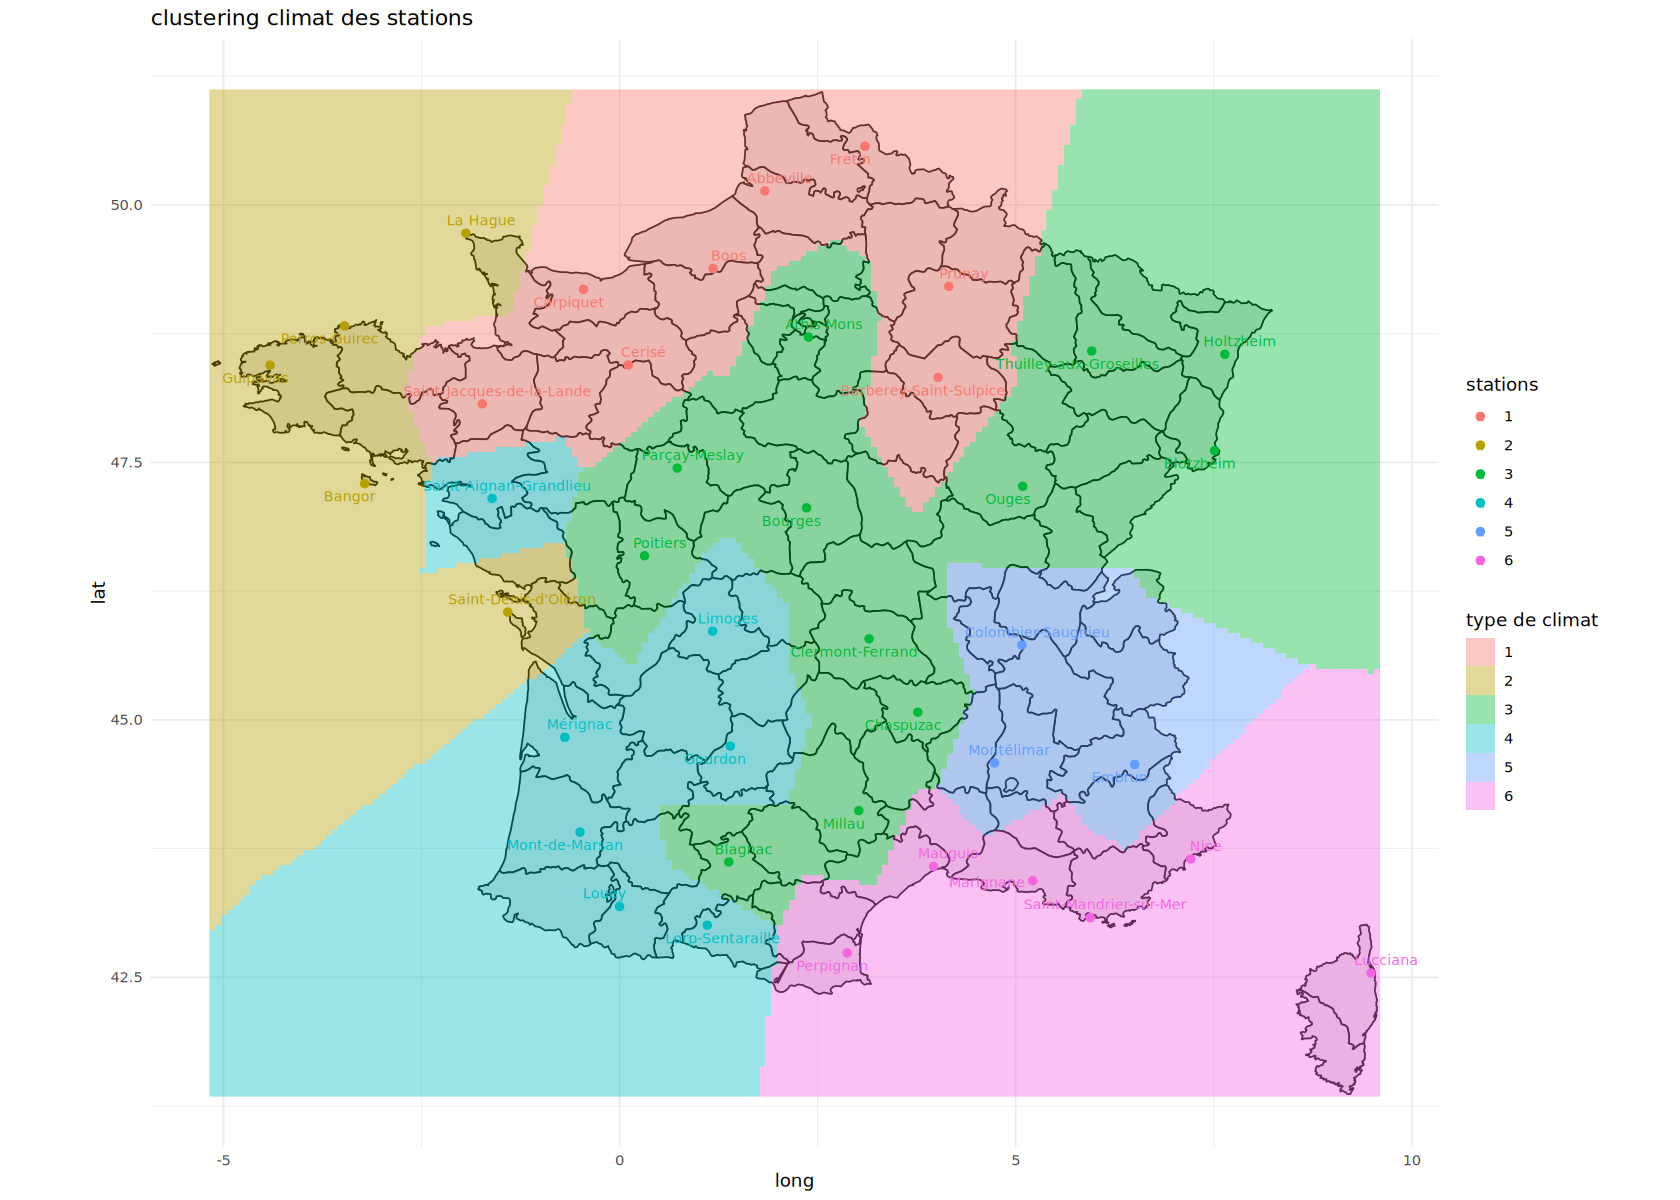

In [22]:
library(ggplot2)
library(maps)
library(FNN)   # pour knn

# 1. Carte de France
france_map <- map_data("france")

# 2. Grille régulière couvrant la France
x_seq <- seq(min(france_map$long), max(france_map$long), length.out = 200)
y_seq <- seq(min(france_map$lat), max(france_map$lat), length.out = 200)
grid <- expand.grid(Longitude = x_seq, Latitude = y_seq)

# 3. Associer chaque point de la grille au cluster le + proche
nn <- get.knnx(stations_france[,c("Longitude","Latitude")], 
               grid, k = 1)
grid$cluster <- stations_france$cluster[nn$nn.index]

# 4. Affichage
ggplot() +
  geom_polygon(data = france_map,
               aes(x = long, y = lat, group = group),
               fill = "grey90", color = "black") +
  geom_raster(data = grid,
              aes(x = Longitude, y = Latitude, fill = cluster),
              alpha = 0.4) +
  geom_point(data = stations_france,
             aes(x = Longitude, y = Latitude, color = cluster),
             size = 2) +
  geom_text_repel(data = stations_france,
                  aes(x = Longitude, y = Latitude, 
                      label = communes..name., color = cluster),
                  size = 3, max.overlaps = 20) +
  coord_fixed(1.3) +
  theme_minimal() +
  labs(title = "clustering climat des stations",
       fill = "type de climat", color = "stations")


Warning message:
“Raster pixels are placed at uneven horizontal intervals and will be shifted
ℹ Consider using `geom_tile()` instead.”


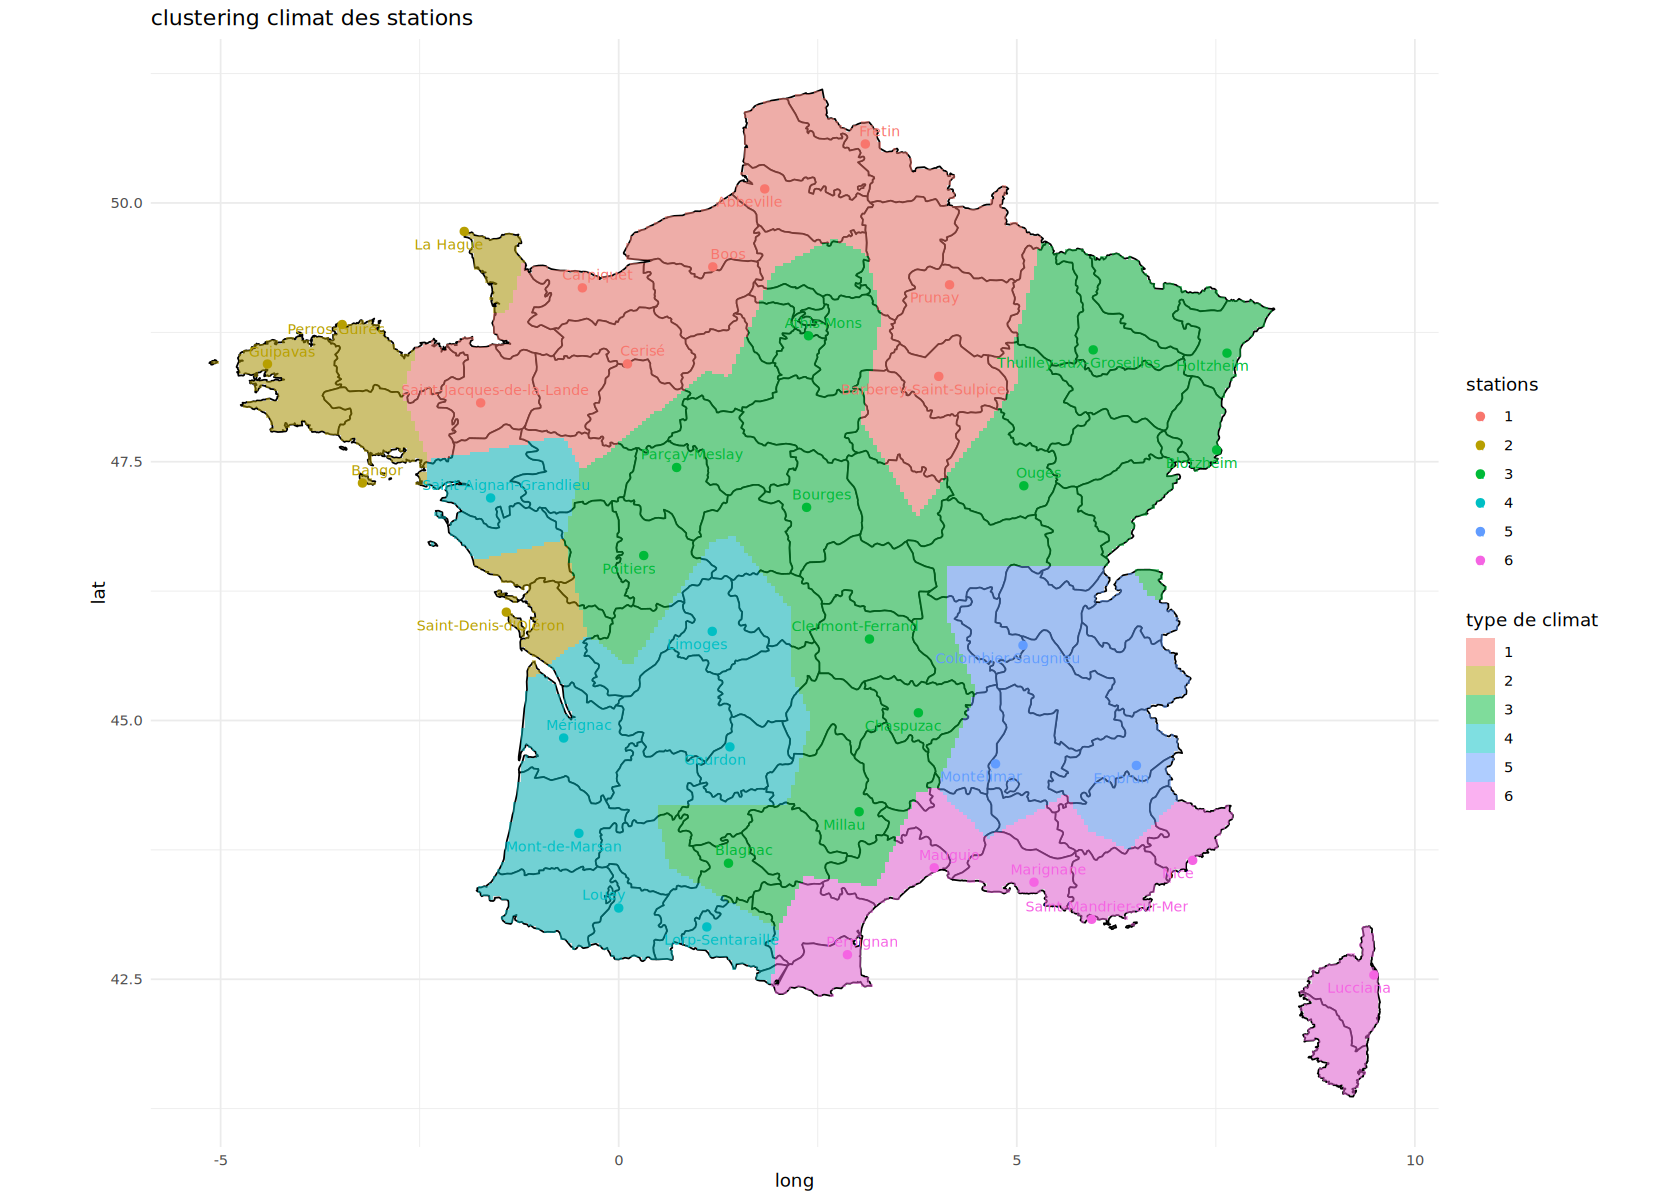

In [21]:
# 1. Carte de France
france_map <- map_data("france")

# 2. Grille régulière couvrant la France
x_seq <- seq(min(france_map$long), max(france_map$long), length.out = 300)
y_seq <- seq(min(france_map$lat), max(france_map$lat), length.out = 300)
grid <- expand.grid(Longitude = x_seq, Latitude = y_seq)

# 3. Tester l’appartenance à AU MOINS un polygone
inside_any <- rep(0, nrow(grid))

for(g in unique(france_map$group)){
  poly <- france_map[france_map$group == g, ]
  inside <- point.in.polygon(grid$Longitude, grid$Latitude,
                             poly$long, poly$lat)
  inside_any <- pmax(inside_any, inside)  # garde le max (0=dehors, >0=dans)
}

grid <- grid[inside_any > 0, ]  # ne garde que les points à l’intérieur de la France

# 4. Associer chaque point de la grille au cluster le + proche
nn <- get.knnx(stations_france[,c("Longitude","Latitude")], 
               grid, k = 1)
grid$cluster <- stations_france$cluster[nn$nn.index]

# 5. Affichage
ggplot() +
  geom_polygon(data = france_map,
               aes(x = long, y = lat, group = group),
               fill = "grey90", color = "black") +
  geom_raster(data = grid,
              aes(x = Longitude, y = Latitude, fill = cluster),
              alpha = 0.5) +
  geom_point(data = stations_france,
             aes(x = Longitude, y = Latitude, color = cluster),
             size = 2) +
  geom_text_repel(data = stations_france,
                  aes(x = Longitude, y = Latitude, 
                      label = communes..name., color = cluster),
                  size = 3, max.overlaps = 20) +
  coord_fixed(1.3, xlim = range(france_map$long), ylim = range(france_map$lat)) +
  theme_minimal() +
  labs(title = "clustering climat des stations",
       fill = "type de climat", color = "stations")


Warning message:
“Raster pixels are placed at uneven horizontal intervals and will be shifted
ℹ Consider using `geom_tile()` instead.”


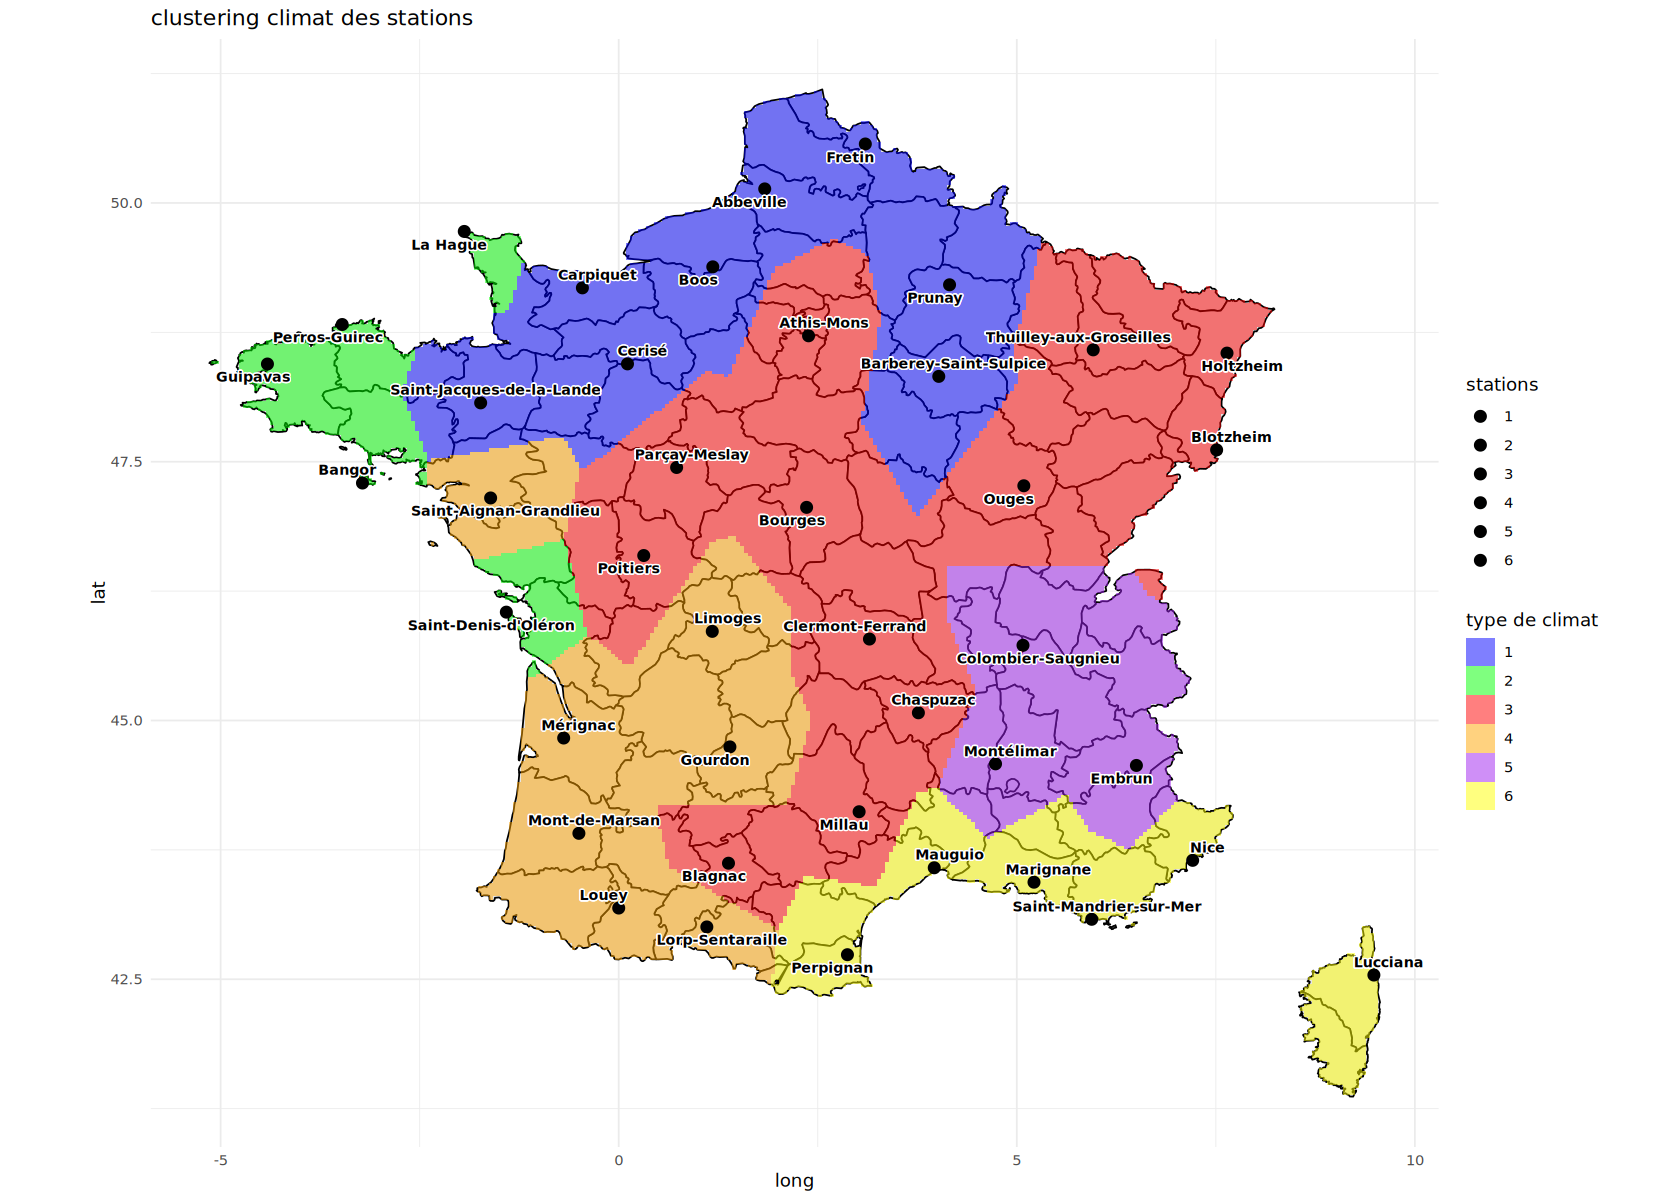

In [11]:
# 1. Carte de France
france_map <- map_data("france")

# 2. Grille régulière couvrant la France
x_seq <- seq(min(france_map$long), max(france_map$long), length.out = 300)
y_seq <- seq(min(france_map$lat), max(france_map$lat), length.out = 300)
grid <- expand.grid(Longitude = x_seq, Latitude = y_seq)

# 3. Tester l’appartenance à AU MOINS un polygone
inside_any <- rep(0, nrow(grid))

for(g in unique(france_map$group)){
  poly <- france_map[france_map$group == g, ]
  inside <- point.in.polygon(grid$Longitude, grid$Latitude,
                             poly$long, poly$lat)
  inside_any <- pmax(inside_any, inside)  # garde le max (0=dehors, >0=dans)
}

grid <- grid[inside_any > 0, ]  # ne garde que les points à l’intérieur de la France

# 4. Associer chaque point de la grille au cluster le + proche
nn <- get.knnx(stations_france[,c("Longitude","Latitude")], 
               grid, k = 1)
grid$cluster <- stations_france$cluster[nn$nn.index]

ggplot() +
  geom_polygon(data = france_map,
               aes(x = long, y = lat, group = group),
               fill = "grey90", color = "black") +
  geom_raster(data = grid,
              aes(x = Longitude, y = Latitude, fill = cluster),
              alpha = 0.5) +
  geom_point(data = stations_france,
             aes(x = Longitude, y = Latitude, color = cluster),
             size = 2) +
  
  geom_point(data = stations_france,
             aes(x = Longitude, y = Latitude, color = cluster),
             size = 3) +
  geom_text_repel(data = stations_france,
                  aes(x = Longitude, y = Latitude, 
                      label = communes..name., color = cluster),
                  size = 3, max.overlaps = 20,
                  fontface = "bold",
                  bg.color = "white", bg.r = 0.15) + # surlignage des textes
  
  coord_fixed(1.3, xlim = range(france_map$long), ylim = range(france_map$lat)) +
  theme_minimal() +
  labs(title = "clustering climat des stations",
       fill = "type de climat", color = "stations") +
  scale_fill_manual(values = c(
    "1" = "blue",
    "2" = "green",
    "3" = "red",
    "4" = "orange",
    "5" = "purple",
    "6" = "yellow"
  )) +
  scale_color_manual(values = c(
    "1" = "black",
    "2" = "black",
    "3" = "black",
    "4" = "black",
    "5" = "black",
    "6" = "black"
  ))


In [ ]:
# write.csv(stations_france, "../clusters_climate_stations.csv", row.names = FALSE)